# Nota no ENEM x IDHM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mediaEnemPorMunicipio = pd.read_csv("mediaEnemPorMunicipio.csv", sep=",", index_col=0)
#aqui eu importo o data frame e informo que não quero que ele crie a coluna de indice visto que a mesma ja foi criado no momento da exportação

In [4]:
mediaEnemPorMunicipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [5]:
atlasHumano = pd.read_csv('D:/Projetos/dadosBrutos/idhm municipios 2010.csv')

In [6]:
atlasHumano.head()

,codMunicipio,Município,Estado,IDHM,IDHM_R,IDHM_L,IDHM_E
0,5200050,Abadia de Goiás,GO,"0,708","0,687","0,83","0,622"
1,3100104,Abadia dos Dourados,MG,"0,689","0,693","0,839","0,563"
2,5200100,Abadiânia,GO,"0,689","0,671","0,841","0,579"
3,3100203,Abaeté,MG,"0,698","0,72","0,848","0,556"
4,1500107,Abaetetuba,PA,"0,628","0,579","0,798","0,537"


In [7]:
mediaEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['codMunicipio'] )

In [8]:
mediaEnemIDHM.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,Município,Estado,IDHM,IDHM_R,IDHM_L,IDHM_E
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1100015,Alta Floresta D'Oeste,RO,"0,641","0,657","0,763","0,526"
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1100023,Ariquemes,RO,"0,702","0,716","0,806","0,6"
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,1100031,Cabixi,RO,"0,65","0,65","0,757","0,559"
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,1100049,Cacoal,RO,"0,718","0,727","0,821","0,62"
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,1100056,Cerejeiras,RO,"0,692","0,688","0,799","0,602"


In [9]:
mediaEnemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
IDHM                        object
IDHM_R                      object
IDHM_L                      object
IDHM_E                      object
dtype: object

In [10]:
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(",",".")))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM_R'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM_L'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM_E'].apply(lambda x: float(str(x).replace(",",".").replace('td>',"")))
#aqui uso a função lambda com o replace para converter cada registro de string em float trocando , por .
#caso contrário dará erro no gráfico

In [11]:
mediaEnemIDHM.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
codMunicipio                 int64
Município                   object
Estado                      object
IDHM                       float64
IDHM_R                     float64
IDHM_L                     float64
IDHM_E                     float64
dtype: object

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

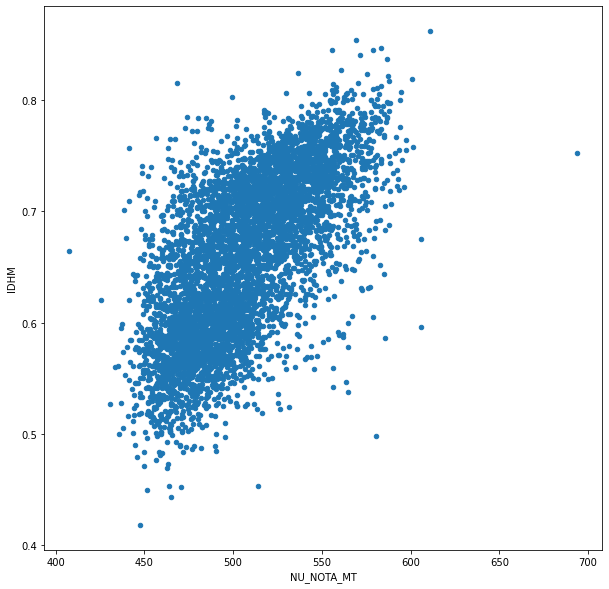

In [12]:
mediaEnemIDHM.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(10,10))
#aqui tenho um gráfico de disperção da Nota de Matémática vs o IDHM

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

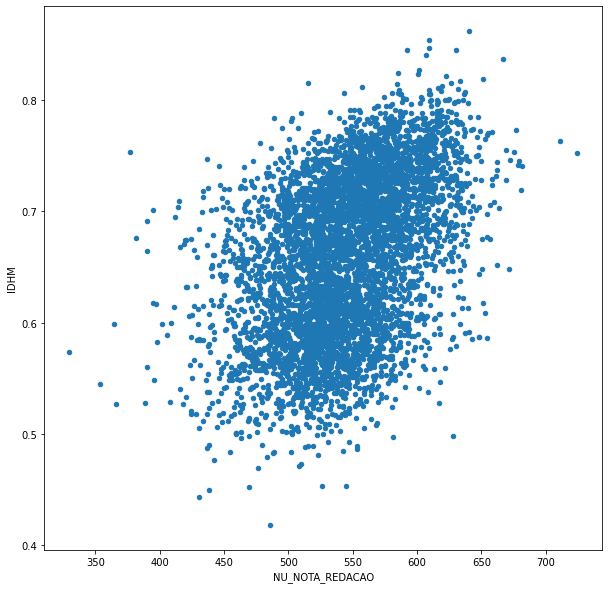

In [13]:
mediaEnemIDHM.plot.scatter('NU_NOTA_REDACAO', 'IDHM', figsize=(10,10))
#aqui tenho um gráfico de disperção da Nota de Redação vs o IDHM

## Aqui vou explorar um pouco mais o gráfico de dispersão

In [14]:
mean_REDACAO = mediaEnemIDHM.NU_NOTA_REDACAO.mean()
mean_MATEMATICA = mediaEnemIDHM.NU_NOTA_MT.mean()
mean_IDHM = mediaEnemIDHM.IDHM.mean()
#aqui crio duas variáveis que retornarão a média geral das notas das redações, matematica e do IDHM

In [15]:
mean_REDACAO

544.1045349735814

In [16]:
mean_MATEMATICA

506.0616635096128

In [17]:
mean_IDHM

0.6592001078748652

### Gráfico de dispersão para nota de redação

In [18]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO

quadrante1 = (idhmMunicipio < mean_IDHM) & (notaMunicipio < mean_REDACAO)
quadrante2 = (idhmMunicipio > mean_IDHM) & (notaMunicipio < mean_REDACAO)
quadrante3 = (idhmMunicipio > mean_IDHM) & (notaMunicipio > mean_REDACAO)
quadrante4 = (idhmMunicipio < mean_IDHM) & (notaMunicipio > mean_REDACAO)
#aqui crio quatro variáveis que definirão os quadrantes do meu novo gráfico de dispersão

mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
#aqui crio 4 novos dataframes filtrando as informações de cada quadrante

quadrante 1: 31.723518850987432% baixo IDHM, baixa nota
quadrante 2: 17.32495511669659% alto IDHM, baixa nota
quadrante 3: 35.152603231597844% alto IDHM, alta nota
quadrante 4: 15.655296229802513% baixo IDHM, alta nota


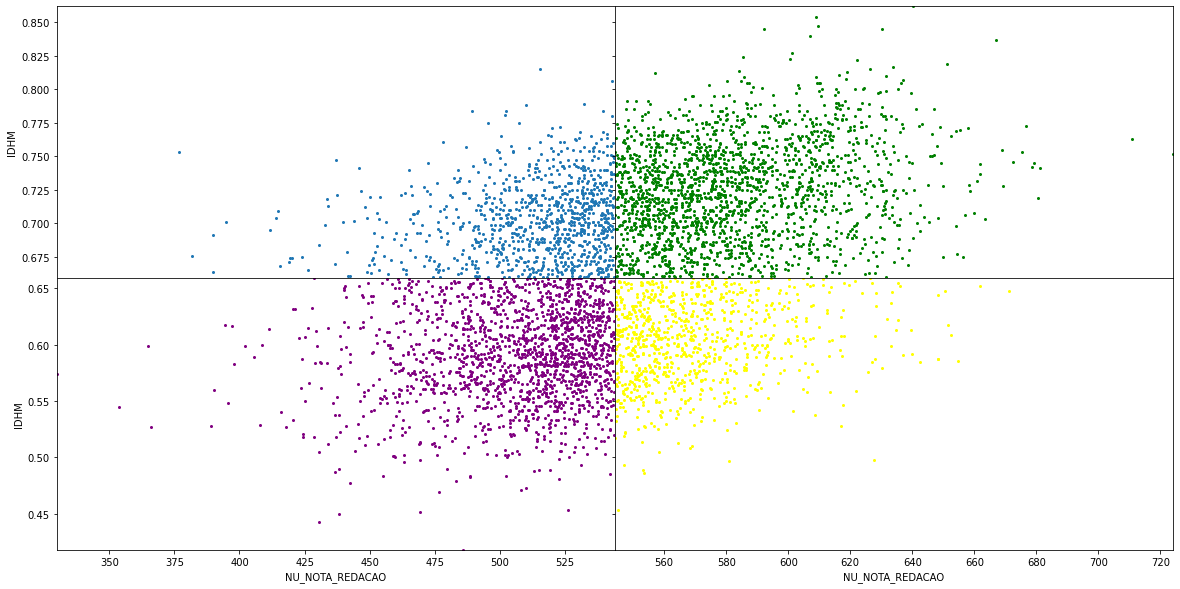

In [19]:
fig, ax = plt.subplots(2,2, figsize=[20,10], sharex = 'col', sharey = 'row')
#aqui defino os subplots para criar o gráfico em quadrantes de 2 e 2
#o share serve para compartilhar as linhas e colunas de x e y, dessa forma faz sumir as linhas que ficam entre quadrantes

plt.subplots_adjust(wspace=0, hspace=0)
#esse método subplots_adjust remove o espaço entre os gráficos

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()
#defini as variáveis de min e max para ajustar a visualização dos limites dos quadrantes

mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color = 'purple', ax = ax[1,0], s=4, xlim = (minRedacao, mean_REDACAO), ylim = (minIDHM, mean_IDHM))
print(f"quadrante 1: {100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)}% baixo IDHM, baixa nota")

mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax = ax[0,0], s=4, xlim = (minRedacao, mean_REDACAO), ylim = (mean_IDHM, maxIDHM))
print(f"quadrante 2: {100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipio)}% alto IDHM, baixa nota")

mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color = 'green', ax = ax[0,1], s=4, xlim = (mean_REDACAO, maxRedacao), ylim = (mean_IDHM, maxIDHM))
print(f"quadrante 3: {100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipio)}% alto IDHM, alta nota")

mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color = 'yellow', ax = ax[1,1], s=4, xlim = (mean_REDACAO, maxRedacao), ylim = (minIDHM, mean_IDHM))
print(f"quadrante 4: {100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipio)}% baixo IDHM, alta nota")
#aqui crio o gráfico de dispersão para cada dataset. O s define o size dos pontos do gráfico

### Gráfico de dispersão para nota de matemática

quadrante 1: 38.59964093357271% baixo IDHM, baixa nota
quadrante 2: 14.0754039497307% alto IDHM, baixa nota
quadrante 3: 38.40215439856373% alto IDHM, alta nota
quadrante 4: 8.779174147217235% baixo IDHM, alta nota


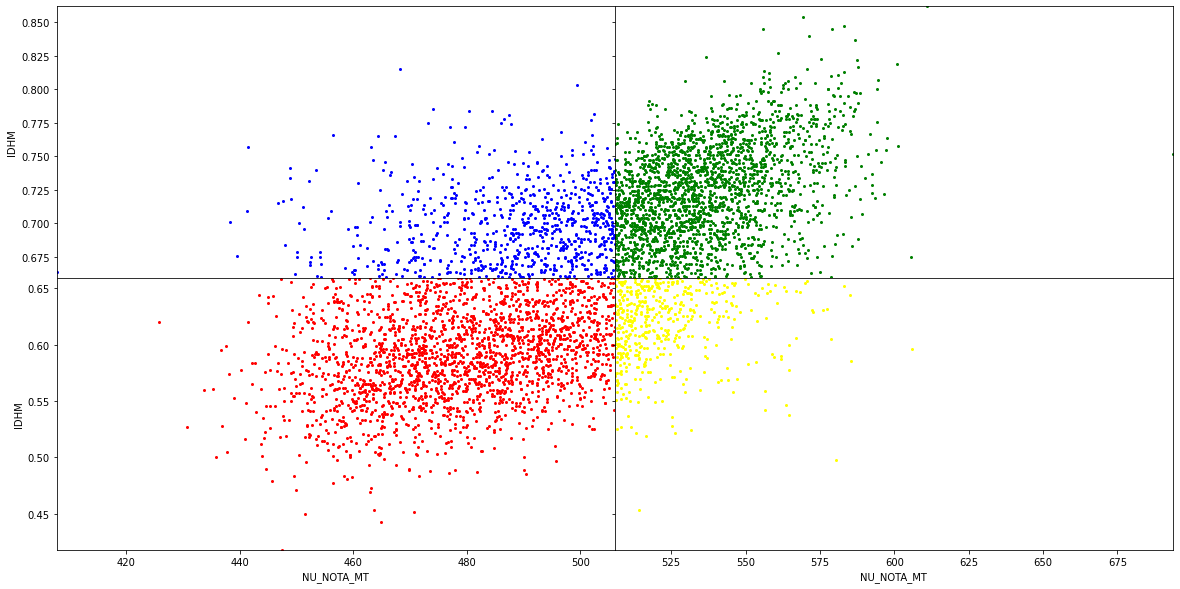

In [20]:
nota_MT_municipio = mediaEnemIDHM.NU_NOTA_MT

quadrante1Mt = (idhmMunicipio < mean_IDHM) & (nota_MT_municipio < mean_MATEMATICA)
quadrante2Mt = (idhmMunicipio > mean_IDHM) & (nota_MT_municipio < mean_MATEMATICA)
quadrante3Mt = (idhmMunicipio > mean_IDHM) & (nota_MT_municipio > mean_MATEMATICA)
quadrante4Mt = (idhmMunicipio < mean_IDHM) & (nota_MT_municipio > mean_MATEMATICA)

mediaEnemIDHM_MT1 = mediaEnemIDHM[quadrante1Mt]
mediaEnemIDHM_MT2 = mediaEnemIDHM[quadrante2Mt]
mediaEnemIDHM_MT3 = mediaEnemIDHM[quadrante3Mt]
mediaEnemIDHM_MT4 = mediaEnemIDHM[quadrante4Mt]

minMatematica = mediaEnemIDHM.NU_NOTA_MT.min()
maxMatematica = mediaEnemIDHM.NU_NOTA_MT.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()

fig, ax = plt.subplots(2,2, figsize=[20,10], sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace=0, hspace=0)

mediaEnemIDHM_MT1.plot.scatter('NU_NOTA_MT', 'IDHM', color = 'red', ax = ax[1,0], s=4, xlim = (minMatematica, mean_MATEMATICA), ylim = (minIDHM, mean_IDHM))
print(f"quadrante 1: {100*len(mediaEnemIDHM_MT1.IDHM)/len(idhmMunicipio)}% baixo IDHM, baixa nota")

mediaEnemIDHM_MT2.plot.scatter('NU_NOTA_MT', 'IDHM', color = 'blue',ax = ax[0,0], s=4, xlim = (minMatematica, mean_MATEMATICA), ylim = (mean_IDHM, maxIDHM))
print(f"quadrante 2: {100*len(mediaEnemIDHM_MT2.IDHM)/len(idhmMunicipio)}% alto IDHM, baixa nota")

mediaEnemIDHM_MT3.plot.scatter('NU_NOTA_MT', 'IDHM', color = 'green', ax = ax[0,1], s=4, xlim = (mean_MATEMATICA, maxMatematica), ylim = (mean_IDHM, maxIDHM))
print(f"quadrante 3: {100*len(mediaEnemIDHM_MT3.IDHM)/len(idhmMunicipio)}% alto IDHM, alta nota")

mediaEnemIDHM_MT4.plot.scatter('NU_NOTA_MT', 'IDHM', color = 'yellow', ax = ax[1,1], s=4, xlim = (mean_MATEMATICA, maxMatematica), ylim = (minIDHM, mean_IDHM))
print(f"quadrante 4: {100*len(mediaEnemIDHM_MT4.IDHM)/len(idhmMunicipio)}% baixo IDHM, alta nota")

## Gráfico de dispersão usando mapa do Brasil com latitude e longitude

In [21]:
#importando dados Municipios
municipios = pd.read_csv("D:/Projetos/dadosBrutos/Municipios-Brasileiros-main/csv/municipios.csv")

In [23]:
#combinando os dados com merge
enem_idhm_municipios = pd.merge(mediaEnemIDHM, municipios, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['codigo_ibge'])

In [24]:
enem_idhm_municipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,...,IDHM,IDHM_R,IDHM_L,IDHM_E,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1100015,...,0.641,0.657,0.763,0.526,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1100023,...,0.702,0.716,0.806,0.600,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821,1100031,...,0.650,0.650,0.757,0.559,1100031,Cabixi,-13.49450,-60.5520,0,11
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074,1100049,...,0.718,0.727,0.821,0.620,1100049,Cacoal,-11.43430,-61.4562,0,11
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222,1100056,...,0.692,0.688,0.799,0.602,1100056,Cerejeiras,-13.18700,-60.8168,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104,5222005,...,0.712,0.710,0.818,0.622,5222005,Vianópolis,-16.74050,-48.5159,0,52
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063,5222054,...,0.684,0.707,0.804,0.562,5222054,Vicentinópolis,-17.73220,-49.8047,0,52
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286,5222203,...,0.647,0.619,0.818,0.534,5222203,Vila Boa,-15.03870,-47.0520,0,52
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,5222302,...,0.634,0.629,0.802,0.505,5222302,Vila Propício,-15.45420,-48.8819,0,52


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

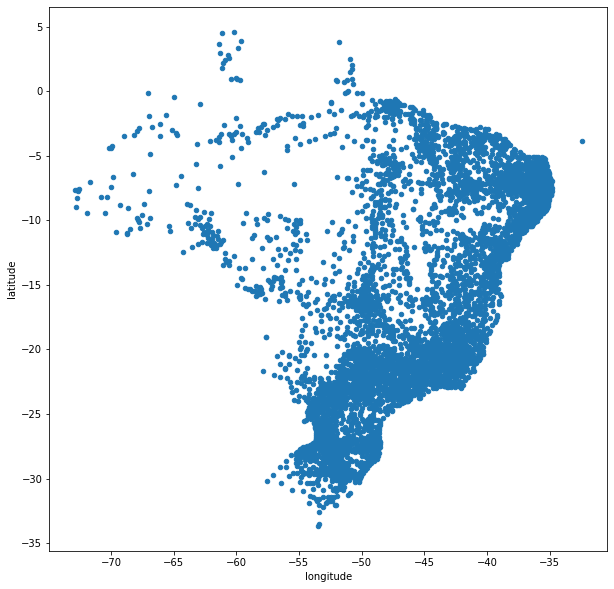

In [29]:
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude',
                                  figsize=(10,10))
#aqui criei um gráfico de dispersão simples passando somente os dados de latitude e longitude

<AxesSubplot:title={'center':'NU_NOTA_REDACAO'}, xlabel='longitude', ylabel='latitude'>

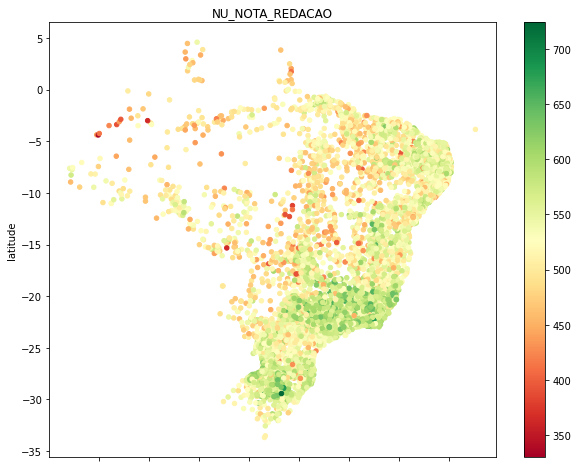

In [31]:
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', 
                                  c=enem_idhm_municipios['NU_NOTA_REDACAO'],
                                  cmap = 'RdYlGn',
                                  figsize=(10,8), title='NU_NOTA_REDACAO')
#já aqui filtrei as cores pela coluna da nota de redação usando o mapa de cores red, yellow e green

<AxesSubplot:title={'center':'NU_NOTA_MT'}, xlabel='longitude', ylabel='latitude'>

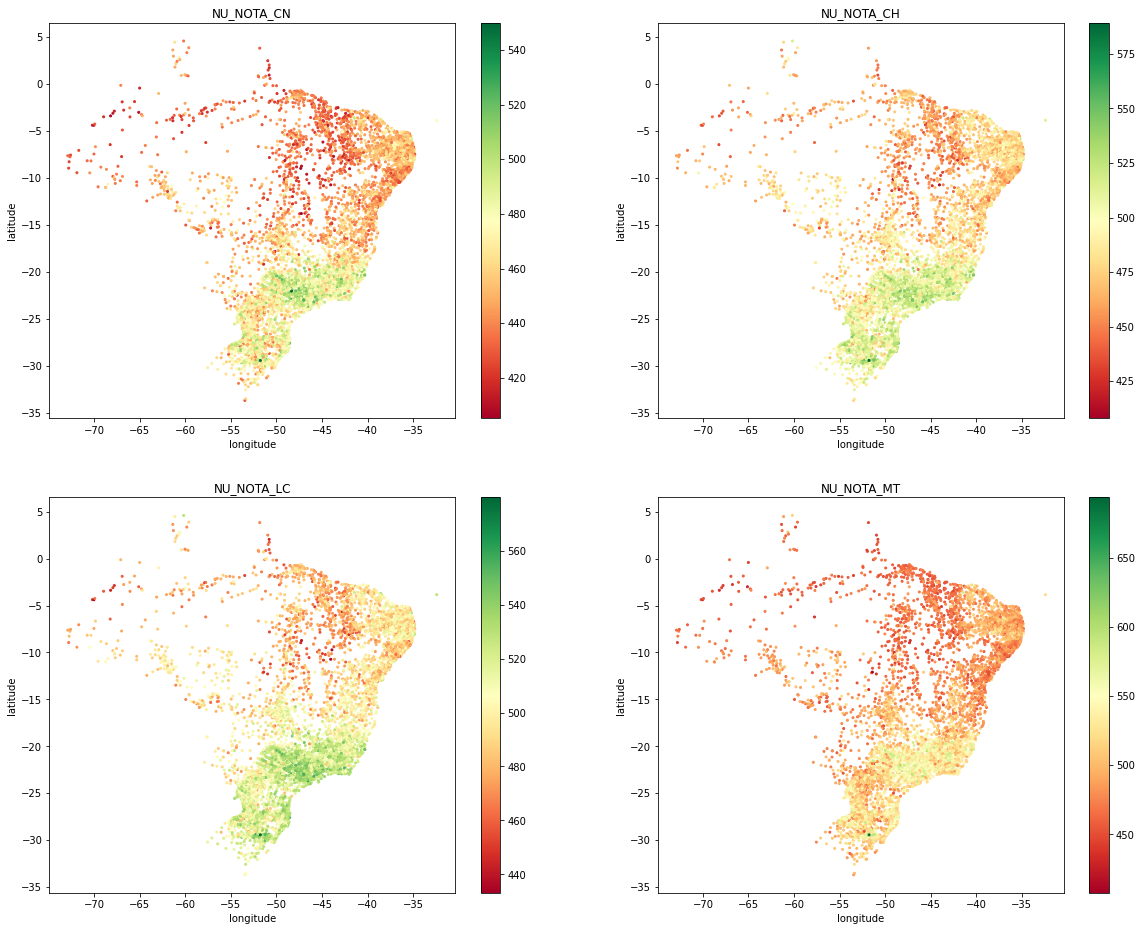

In [48]:
#aqui irei criar um grafico semelhante ao anterior, porém usando 4 subplots, um para cada disciplina
fig, ax = plt.subplots(2,2, figsize=(20,16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4, 
                                  c=enem_idhm_municipios['NU_NOTA_CN'],
                                  cmap = 'RdYlGn',
                                  title='NU_NOTA_CN', ax=ax[0,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['NU_NOTA_CH'],
                                  cmap = 'RdYlGn',
                                  title='NU_NOTA_CH', ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['NU_NOTA_LC'],
                                  cmap = 'RdYlGn',
                                  title='NU_NOTA_LC', ax=ax[1,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['NU_NOTA_MT'],
                                  cmap = 'RdYlGn',
                                  title='NU_NOTA_MT', ax=ax[1,1])


<AxesSubplot:title={'center':'IDHM_E'}, xlabel='longitude', ylabel='latitude'>

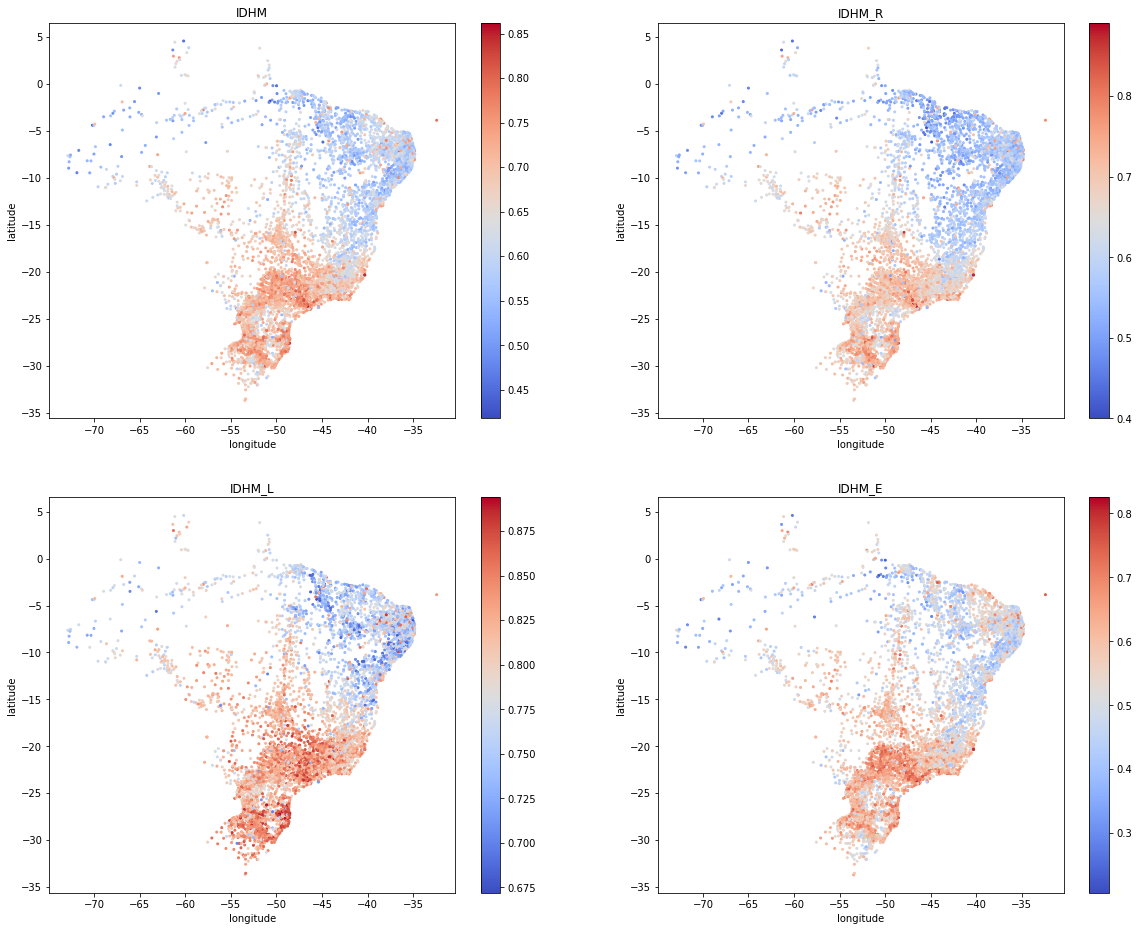

In [49]:
#aqui irei criar um grafico semelhante ao anterior, porém usando 4 subplots, para cada idhm
fig, ax = plt.subplots(2,2, figsize=(20,16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4, 
                                  c=enem_idhm_municipios['IDHM'],
                                  cmap = 'coolwarm',
                                  title='IDHM', ax=ax[0,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['IDHM_R'],
                                  cmap = 'coolwarm',
                                  title='IDHM_R', ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['IDHM_L'],
                                  cmap = 'coolwarm',
                                  title='IDHM_L', ax=ax[1,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', s=4,
                                  c=enem_idhm_municipios['IDHM_E'],
                                  cmap = 'coolwarm',
                                  title='IDHM_E', ax=ax[1,1])